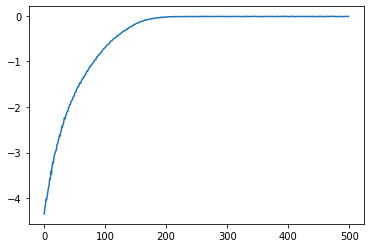

Final params: [-0.007, 4.005, -1.993]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def evolution_strategy(
    f,
    population_size,
    sigma,
    lr,
    initial_params,
    num_iters):

    # assume initial params is a 1-D array
    num_params = len(initial_params)
    reward_per_iteration = np.zeros(num_iters)
    # Initalise parameters
    params = initial_params
    # Loop through num_iters
    for t in range(num_iters):
      # N = noise  
        N = np.random.randn(population_size, num_params)
        # R strores the reward
        R = np.zeros(population_size)
        # loop through each "offspring" and get reward
        for j in range(population_size):
        # Add noise to 'parent' to get offspring
            params_try = params + sigma*N[j]
            # Get reward for a single offspring 
            # 'f' is function to optimise paramaters
            R[j] = f(params_try)
        # m = mean reward for all offspring
        m = R.mean()
        # A = standardised reward for each offspring
        A = (R - m) / R.std()
        # Store reward progress
        reward_per_iteration[t] = m
        # Update parameters
        update_rate = lr/sigma
        for i in range(len(params)):
            adjustment = N[:, i] * A
            mean_adjustment = np.mean(adjustment)
            params[i] = params[i] + update_rate * mean_adjustment     
    
    return params, reward_per_iteration


def reward_function(params):
    # Aim to optimise parameters in function (max reward = 0)

    x0 = params[0]
    x1 = params[1]
    x2 = params[2]
    
    # Oprimal parameters: x0 = 0, x1 = 4,  x2 = -2
    reward = -(x0**2 + 0.1*(x1 - 4)**2 + 0.5*(x2 + 2)**2)
    
    return reward


# Call evolution strategy
best_params, rewards = evolution_strategy(
  f=reward_function,
  population_size=50,
  sigma=0.1,
  lr=3e-3,
  initial_params=np.random.randn(3),
  num_iters=500)

# plot the rewards per iteration
plt.plot(rewards)
plt.show()

# final params
best_params = [np.round(param, 3) for param in best_params]
print("Final params:", best_params)